### 載入所需的Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os

# Current directory
print(os.getcwd())

# change directory
os.chdir('/content/drive/MyDrive/python_training/NLP100Days/day_17-word_embedding-count/')
print(os.getcwd())

/content
/content/drive/MyDrive/python_training/NLP100Days/day_17-word_embedding-count


In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from typing import List

### 載入資料

In [3]:
# read data from spam.csv
sms_data = pd.read_csv('./spam.csv', usecols=[0,1], encoding="latin")
sms_data.columns = ["label", "content"]

###<your code>###
sms_data.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# check how many spams and hams
###<your code>###
sms_data.groupby('label').count()

,content
label,
ham,4825
spam,747


In [5]:
# change label to from string to number
# "ham" --> 0, "spam" --> 1

from sklearn.preprocessing import LabelEncoder # 載入標籤編碼功能 import labelencoder
labelencoder = LabelEncoder() 
sms_data['label'] = labelencoder.fit_transform(sms_data['label'])
#sms_data.loc[sms_data.loc[:, "label"] == "spam", "label"] = 1
#sms_data.loc[sms_data.loc[:, "label"] == "ham", "label"] = 0
###<your code>###
sms_data.head()

,label,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### 切分資料
將資料依據label比例切分為training data與testing data

In [6]:
###<your code>###
train_test_split_index = 0.2
#test_cnt = int(sms_data.shape[0]*0.2)
#train_cnt = sms_data.shape[0] - test_cnt
#sms_train= sms_data[:train_cnt]
#sms_test = sms_data[train_cnt:]
sms_train, sms_test = train_test_split(sms_data, test_size=train_test_split_index, stratify=sms_data.label)
sms_train.reset_index(inplace=True, drop=True)
sms_test.reset_index(inplace=True, drop=True)

print(sms_data.shape[0])
print(sms_train.groupby("label").count())
print(sms_test.groupby("label").count())

5572
       content
label         
0         3859
1          598
       content
label         
0          966
1          149


### 資料預處理
* 將所有字詞轉為小寫
* 移除所有數字、標點符號

In [7]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    
    for i in range(len(df)):
        # make all content to lowercase
        ###<your code>###
        str_df = df.loc[i, "content"].lower()

        # remove all punctuations
        ###<your code>###
        pattern = r'[^\W_]+' ##r"[a-zA-Z]*"
        #str_df = re.findall(pattern, str_df)
        str_df = " ".join([word for word in re.findall(pattern, str_df) if word != ""])
        df.loc[i, "content"] = str_df
    
    return df

processed_train = preprocess(sms_train)
processed_test = preprocess(sms_test)

print("Train:")
print(processed_train.head())
print("Test:")
print(processed_test.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Train:
   label                                            content
0      0  no problem with the renewal i ll do it right a...
1      0                      its a laptop take it with you
2      0  no it will reach by 9 only she telling she wil...
3      0  time n smile r the two crucial things in our l...
4      0  company is very good environment is terrific a...
Test:
   label                                            content
0      0  im at arestaurant eating squid i will be out a...
1      0                                  neva mind it s ok
2      0                                              where
3      0  babe i fucking love you too you know fuck it w...
4      0  haven t found a way to get another app for you...


In [8]:
# split data into x_train, y_train, x_test, y_test
y_train, x_train = zip(*processed_train.values)
y_test, x_test = zip(*processed_test.values)

# check numbers of unique word in the corpus
len(set(" ".join(list(x_train + x_test)).split()))

8707

In [9]:
x_train[:5]

('no problem with the renewal i ll do it right away but i dont know his details',
 'its a laptop take it with you',
 'no it will reach by 9 only she telling she will be there i dont know',
 'time n smile r the two crucial things in our life sometimes time makes us to forget smile and sometimes someone s smile makes us to forget time gud noon',
 'company is very good environment is terrific and food is really nice')

In [10]:
y_train[:5]

(0, 0, 0, 0, 0)

### TF-IDF
可以發現種共有7708個字詞，這裡使用TF-IDF將來選取最高分的前2000個字詞
(若忘記的學員可參考先前TF-IDF課程章節或[此篇教學](https://ithelp.ithome.com.tw/articles/10228815?sc=iThelpR))

In [11]:
###<your code>###
vectorizer = TfidfVectorizer(max_features=2000)
vectorizer.fit(x_train)
tfidf_train = vectorizer.transform(x_train)
tfidf_test = vectorizer.transform(x_test)

print(tfidf_train.toarray())

print(f"Number of unique word: {len(vectorizer.vocabulary_)}")
(tfidf_train, tfidf_test)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Number of unique word: 2000


(<4457x2000 sparse matrix of type '<class 'numpy.float64'>'
 	with 50982 stored elements in Compressed Sparse Row format>,
 <1115x2000 sparse matrix of type '<class 'numpy.float64'>'
 	with 12750 stored elements in Compressed Sparse Row format>)

### 建立共現矩陣

In [12]:
def create_co_matrix(corpus: List[str], vocab_list: List[str], word2idx: dict,
                     window_size: int=1, use_weighting: bool=False, verbose: bool=False) -> np.ndarray:
    '''Function to create co-occurrence matrix
    '''
    #initialize co-occurrence matrix
    ###<your code>###
    co_matrix = np.zeros(shape=(len(vocab_list), len(vocab_list)), dtype=np.int32)

    for idx, sms in enumerate(corpus):
        ###<your code>###
        sms = sms.split() # 以空格为分隔符，包含 \n
        sms_ids = [word2idx[word] for word in sms if word in vocab_list] #tokenize
                
        for center_i, center_word_id in enumerate(sms_ids):  
            ###<your code>###
            context_ids = sms_ids[max(0, center_i - window_size):center_i] ## window_size):center_word_id
            content_len = len(context_ids)
            
            for left_i, left_word_id in enumerate(context_ids): 
                ###<your code>###
                if use_weighting:
                    distance = content_len - left_i
                    increment = 1./float(distance)
                    #print(f"dist {distance,content_len,left_i}")
                else:
                    increment = 1
                    
                co_matrix[center_word_id, left_word_id] += increment
                co_matrix[left_word_id, center_word_id] += increment        
        
        if verbose:
            if idx != 0 and idx%500 == 0:
                    print(f"finishing {idx+1}/{len(corpus)}")
    print("Done")
    if use_weighting:
        # if use weighting, then we set the co-occurrence with the word itself to 1.0
        ###<your code>###
        np.fill_diagonal(co_matrix, 1.)

    return co_matrix

co_matrix = create_co_matrix(x_train, vectorizer.get_feature_names(), vectorizer.vocabulary_,
                            window_size=3, use_weighting=True, verbose=True)

co_matrix

finishing 501/4457
finishing 1001/4457
finishing 1501/4457
finishing 2001/4457
finishing 2501/4457
finishing 3001/4457
finishing 3501/4457
finishing 4001/4457
Done


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

### 建立PPMI矩陣

In [13]:
#定義正向點間互資訊

def ppmi(co_matrix: np.ndarray, eps: float=1e-8, verbose: bool=False):
    ###<your code>###
    M = np.zeros_like(co_matrix, dtype=np.float32)
    N = np.sum(co_matrix)
    S = np.sum(co_matrix, axis=0)
    total = co_matrix.shape[0]*co_matrix.shape[1]
    cnt = 0
    for i in range(co_matrix.shape[0]):
        for j in range(co_matrix.shape[1]):
            ###<your code>###
            pmi = np.log2(co_matrix[i, j]*N / (S[i]*S[j] + eps))
            M[i, j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % 10 == 0 or cnt == total:
                    print(f"{cnt}/{total} Done")
    
    return M

ppmi_matrix = ppmi(co_matrix, verbose=False)
ppmi_matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


array([[ 9.267534 ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  5.3235636,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  9.053704 , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ..., 10.328564 ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  4.668414 ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         8.172559 ]], dtype=float32)

In [14]:
ppmi_matrix.shape

(2000, 2000)

### 使用SVD降維
利用sklearn中的TruncatedSVD對co-occurrence matrix進行降維，並利用variance來找出最適合的維度
[參考文獻](https://medium.com/swlh/truncated-singular-value-decomposition-svd-using-amazon-food-reviews-891d97af5d8d)

(讀者可以嘗試使用SVD對PPMI進行降維)

Number of components = 10 and explained variance = 0.7401483624241665
Number of components = 20 and explained variance = 0.81139613249404
Number of components = 30 and explained variance = 0.8478756085108782
Number of components = 40 and explained variance = 0.8710840100846768
Number of components = 50 and explained variance = 0.8887203862833433
Number of components = 60 and explained variance = 0.9026981921596043
Number of components = 70 and explained variance = 0.9137230013067746
Number of components = 80 and explained variance = 0.9227535372883332
Number of components = 90 and explained variance = 0.9302556105135472
Number of components = 100 and explained variance = 0.9367053790807007
Number of components = 110 and explained variance = 0.9422197180881223
Number of components = 120 and explained variance = 0.9470104112542291
Number of components = 130 and explained variance = 0.951053651181497
Number of components = 140 and explained variance = 0.9545566862941257


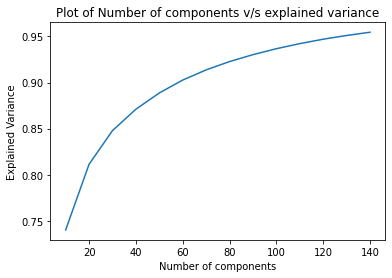

In [15]:
# Program to find the optimal number of components for Truncated SVD
n_comp = range(10,150,10) # list containing different values of components
variance_sum = [] # explained variance ratio for each component of Truncated SVD

for dim in n_comp:
    ###<your code>###
    svd = TruncatedSVD(n_components=dim)
    svd.fit(co_matrix)
    variance_sum.append(svd.explained_variance_ratio_.sum())
    print(f"Number of components = {dim} and explained variance = {svd.explained_variance_ratio_.sum()}")
 
plt.plot(n_comp, variance_sum)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [16]:
# choose 140 as final dimension to reduce to 
# 利用上述找到的最適合dimension來對co-occurrence matrix進行降維
###<your code>###
svd = TruncatedSVD(n_components=140)
svd.fit(co_matrix)
re_co_matrix = svd.transform(co_matrix)


### 使用KNN模型進行分類
在進行分類之前，先利用簡單的詞向量平均來計算文本向量

[參考文獻](https://medium.com/ai-academy-taiwan/nlp-%E4%B8%8D%E5%90%8C%E8%A9%9E%E5%90%91%E9%87%8F%E5%9C%A8%E6%96%87%E6%9C%AC%E5%88%86%E9%A1%9E%E4%B8%8A%E7%9A%84%E8%A1%A8%E7%8F%BE%E8%88%87%E5%AF%A6%E4%BD%9C-e72a2daecfc)

In [17]:
# get doc vector via take mean of all word vectors inside the corresponding document

def make_doc_vectors(corpus: List[str], word2idx: dict, vocab_list: List) -> List[np.ndarray]:
    
    # vectorizing data 
    # and make document vector by take mean to all word vecto
    doc_vec = []
    empty_doc_list = []
    for i, sms_msg in enumerate(corpus):
        sms_msg = [word2idx[word] for word in sms_msg.split() if word in vocab_list] #tokenize
        if len(sms_msg) > 0:
            sms_msg = np.array([re_co_matrix[ids] for ids in sms_msg]) #vectorize
            doc_vec.append(sms_msg.mean(axis=0))
        else:
            empty_doc_list.append(i)
            print(f"document {i} doesn't contain word in vocab_list")
            print(corpus[i])
            print("\n")
        
    return np.vstack(doc_vec), empty_doc_list

word2idx = vectorizer.vocabulary_
vocab_list = vectorizer.get_feature_names()

doc_vec_train, missing_train_list = make_doc_vectors(x_train, word2idx, vocab_list)
print("="*50)
doc_vec_test, missing_test_list = make_doc_vectors(x_test, word2idx, vocab_list)

document 89 doesn't contain word in vocab_list
k k congratulation


document 277 doesn't contain word in vocab_list
erutupalam thandiyachu


document 1205 doesn't contain word in vocab_list
hanks lotsly


document 1307 doesn't contain word in vocab_list
raviyog peripherals bhayandar east


document 1315 doesn't contain word in vocab_list
staff science nus edu sg phyhcmk teaching pc1323


document 1492 doesn't contain word in vocab_list
g w r


document 1835 doesn't contain word in vocab_list
audrie lousy autocorrect


document 2961 doesn't contain word in vocab_list
east coast


document 3008 doesn't contain word in vocab_list
beerage


document 3434 doesn't contain word in vocab_list
645


document 3472 doesn't contain word in vocab_list



document 3922 doesn't contain word in vocab_list
ultimately tor motive tui achieve korli


document 4410 doesn't contain word in vocab_list



document 920 doesn't contain word in vocab_list
2 2 146tf150p


document 951 doesn't contain word in voca

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# training
y_train_filter = np.delete(np.array(y_train), missing_train_list)

###<your code>###
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(doc_vec_train, y_train_filter)
train_pred = knn.predict(doc_vec_train)

# testing
y_test_filter = np.delete(np.array(y_test), missing_test_list)
###<your code>###
test_pred = knn.predict(doc_vec_test)

In [20]:
print(f"train acc: {np.sum(train_pred == y_train_filter) / len(y_train_filter)}")
print(f"test acc: {np.sum(test_pred == y_test_filter) / len(y_test_filter)}")

train acc: 0.9675967596759676
test acc: 0.954136690647482


train acc: 0.9633625533827826

train acc: 0.9511754068716094